In [1]:
import sys
import pathlib as pl
import math

import geopandas as gpd
import shapely.geometry as sg

sys.path.append("../")

import geohex as gh


%load_ext autoreload
%autoreload 2

DATA_DIR = pl.Path("../tests/data")
NZTM = "epsg:2193"  # New Zealand Transverse Mercator CRS
WGS84 = "epsg:4326"

In [2]:
ghs = gh.GeoHexSystem(NZTM, 50, 0, 0)
ghs

GeoHexSystem(crs='epsg:2193', R=50, x=0, y=0)

,cell_id,geometry
0,0-0,"POLYGON ((50.000 0.000, 25.000 43.301, -25.000..."
1,0-1,"POLYGON ((50.000 86.603, 25.000 129.904, -25.0..."


<AxesSubplot:>

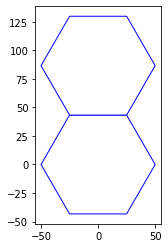

In [3]:
R = ghs.R
cells = ghs.grid_from_bbox(-0.1 * R, -0.1 * R, 0.1 * R, R, as_gdf=True)

display(cells)
cells.plot(color="white", edgecolor="blue")

<AxesSubplot:>

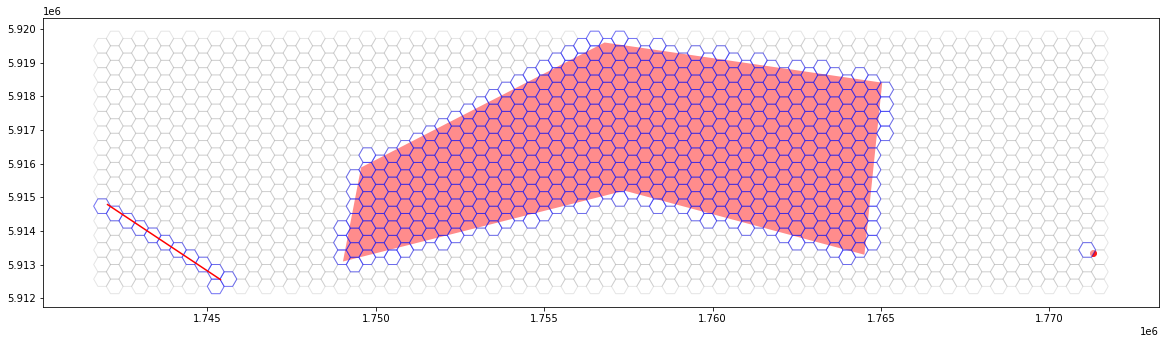

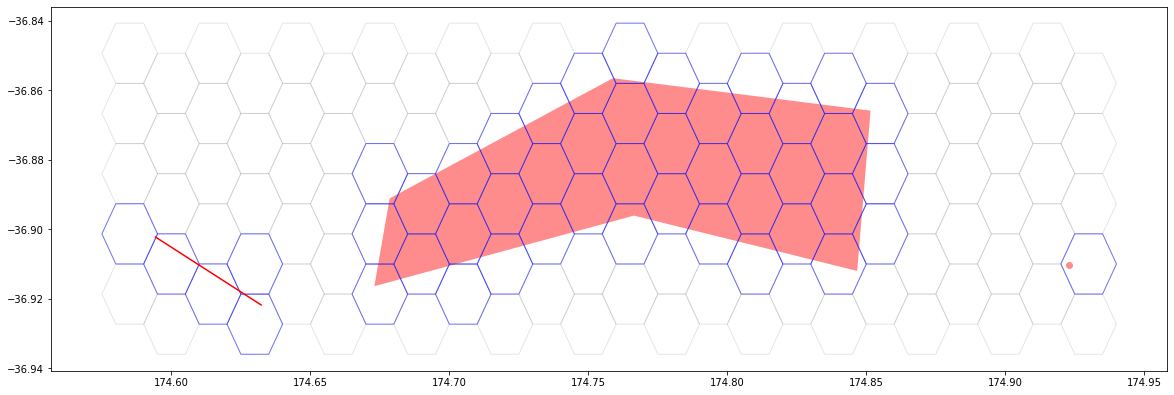

In [4]:
shapes = gpd.read_file(DATA_DIR / "shapes.geojson").to_crs(NZTM)
base = shapes.plot(color='red', figsize=(20, 20), aspect="equal")
ghs = gh.GeoHexSystem(NZTM, 250, 0, 0)

# Grid 1 in black
grid1 = ghs.grid_from_gdf(shapes)
grid1.plot(ax=base, color='white', edgecolor="black", alpha=0.1)

# Grid 2 (intersected with shapes) in blue
grid2 = ghs.grid_from_gdf(shapes, intersect=True)
grid2.plot(ax=base, color='white', edgecolor="blue", alpha=0.5)

# Try again in WGS84 with larger cells
shapes = gpd.read_file(DATA_DIR / "shapes.geojson")
base = shapes.plot(color='red', figsize=(20, 20), aspect="equal")
ghs = gh.GeoHexSystem(WGS84, 0.01, 0, 0)

# Grid 1 in black
grid1 = ghs.grid_from_gdf(shapes)
grid1.plot(ax=base, color='white', edgecolor="black", alpha=0.1)

# Grid 2 (intersected with shapes) in blue
grid2 = ghs.grid_from_gdf(shapes, intersect=True)
grid2.plot(ax=base, color='white', edgecolor="blue", alpha=0.5)



CPU times: user 522 ms, sys: 235 µs, total: 523 ms
Wall time: 523 ms
#cells in grid = 1280


<AxesSubplot:>

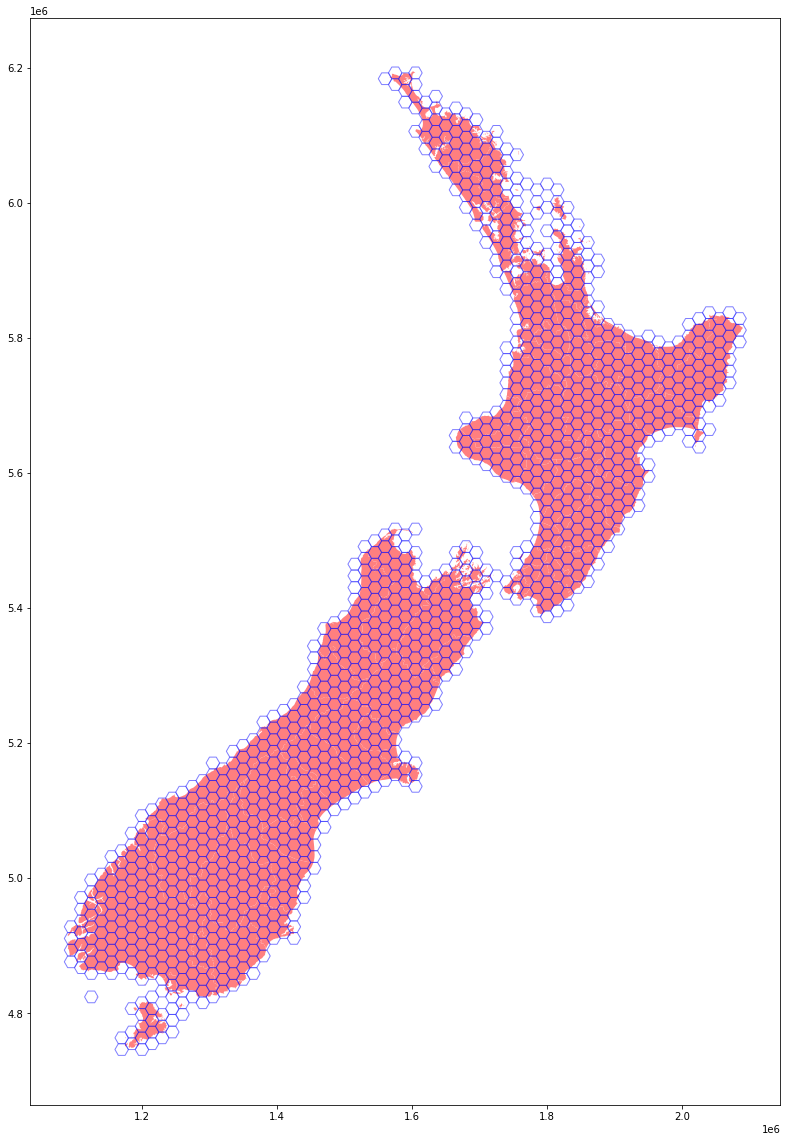

In [19]:
shapes = gpd.read_file(DATA_DIR / "nz_tas.gpkg")  # New Zealand territorial authorities

%time grid = gh.make_grid(shapes, 10_000, intersect=True)  # 10 seconds

print("#cells in grid =", grid.shape[0])
base = shapes.plot(color='red', figsize=(20, 20), aspect="equal")
grid.plot(ax=base, color='white', edgecolor="blue", alpha=0.5)
